In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [2]:
# 데이터 로드 및 전처리
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 데이터 크기 출력
print("훈련 이미지 shape:", x_train.shape)  
print("테스트 이미지 shape:", x_test.shape)   
print("훈련 라벨 shape:", y_train.shape)    
print("테스트 라벨 shape:", y_test.shape)  

훈련 이미지 shape: (60000, 28, 28)
테스트 이미지 shape: (10000, 28, 28)
훈련 라벨 shape: (60000,)
테스트 라벨 shape: (10000,)


In [3]:
# 데이터 전처리
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test  = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0
y_train_cat = to_categorical(y_train, 10)
y_test_cat  = to_categorical(y_test, 10)

In [4]:
# CNN 모델 구성
model = Sequential([
    Conv2D(32, (3, 3), activation = 'relu', input_shape = (28, 28, 1)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation = 'relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation = 'relu'),
    Dropout(0.5),
    Dense(10, activation = 'softmax')
])

c:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# 컴파일
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
# 학습
history = model.fit(x_train, y_train_cat,
                    epochs = 5, batch_size = 64,
                    validation_split = 0.1)

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.8299 - loss: 0.5297 - val_accuracy: 0.9840 - val_loss: 0.0542
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9741 - loss: 0.0901 - val_accuracy: 0.9898 - val_loss: 0.0399
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9815 - loss: 0.0638 - val_accuracy: 0.9903 - val_loss: 0.0366
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.9852 - loss: 0.0474 - val_accuracy: 0.9918 - val_loss: 0.0310
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.9883 - loss: 0.0383 - val_accuracy: 0.9908 - val_loss: 0.0346


In [9]:
# 평가
test_loss, test_acc = model.evaluate(x_test, y_test_cat)
print(f" CNN Test Accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9884 - loss: 0.0316
 CNN Test Accuracy: 0.9918


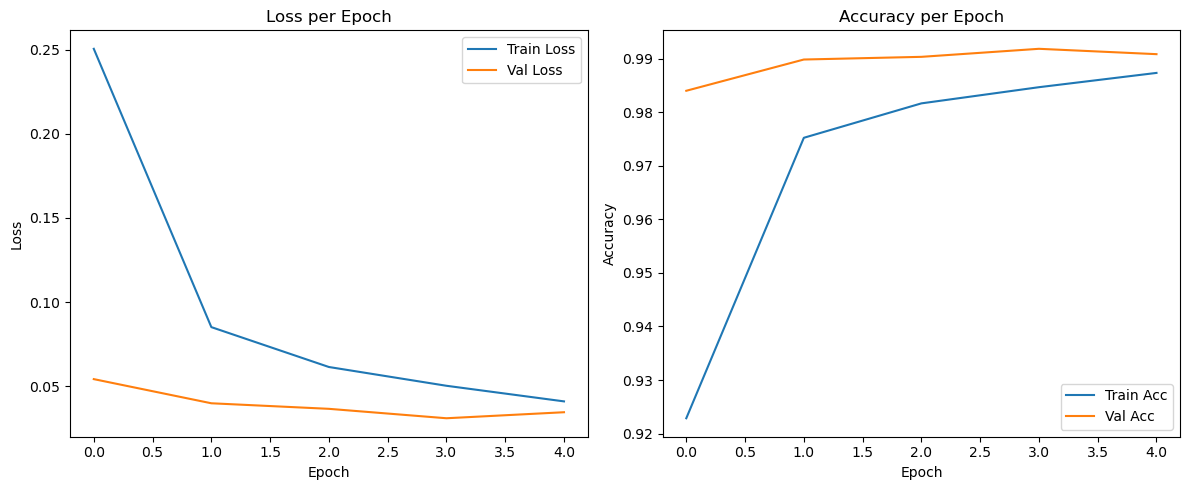

In [ ]:
import matplotlib.pyplot as plt

# Loss & Accuracy 그래프
plt.figure(figsize=(12, 5))

# Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label = 'Train Loss')
plt.plot(history.history['val_loss'], label = 'Val Loss')
plt.title("Loss per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label = 'Train Acc')
plt.plot(history.history['val_accuracy'], label = 'Val Acc')
plt.title("Accuracy per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


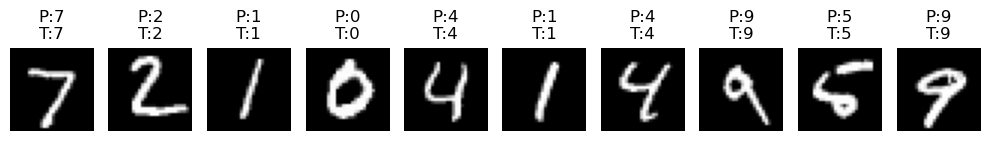

In [ ]:
import numpy as np

# 예측
pred_probs = model.predict(x_test)
pred_labels = np.argmax(pred_probs, axis=1)

# 예시 이미지 비교
plt.figure(figsize = (10, 2))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap = 'gray')
    plt.title(f"P:{pred_labels[i]}\nT:{y_test[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


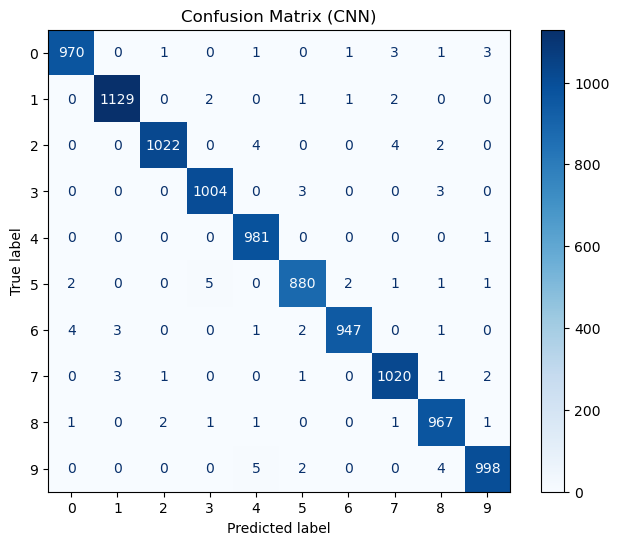

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 혼동 행렬
cm = confusion_matrix(y_test, pred_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = np.arange(10))

# 시각화
fig, ax = plt.subplots(figsize = (8, 6))
disp.plot(ax = ax, cmap = 'Blues')
plt.title("Confusion Matrix (CNN)")
plt.show()


In [ ]:
from sklearn.metrics import classification_report

# 정밀도, 재현율, F1-score 출력
report = classification_report(y_test, pred_labels, digits = 4)
print(report)

              precision    recall  f1-score   support

           0     0.9928    0.9898    0.9913       980
           1     0.9947    0.9947    0.9947      1135
           2     0.9961    0.9903    0.9932      1032
           3     0.9921    0.9941    0.9931      1010
           4     0.9879    0.9990    0.9934       982
           5     0.9899    0.9865    0.9882       892
           6     0.9958    0.9885    0.9921       958
           7     0.9893    0.9922    0.9908      1028
           8     0.9867    0.9928    0.9898       974
           9     0.9920    0.9891    0.9906      1009

    accuracy                         0.9918     10000
   macro avg     0.9917    0.9917    0.9917     10000
weighted avg     0.9918    0.9918    0.9918     10000

